In [8]:
import numpy as np
from numpy import random as rand
import matplotlib.pyplot as plt
import scipy.linalg 
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [17]:
class Catan_Board:
    
    def __init__(self=None,mode=None,big=None):
        self.big=big
        self.mode=mode              
                   
    def Num2Res(self=None):
        
        if self.big == 0:
            Num_Values=np.hstack([5*np.ones(4,dtype=int),
                                  4*np.ones(4,dtype=int),
                                  3*np.ones(4,dtype=int),
                                  2*np.ones(4,dtype=int),
                                    np.ones(2,dtype=int)])
            Num_Tokens=np.array([6,6,8,8,5,5,9,9,4,4,10,10,3,3,11,11,2,12],dtype=int)
            r=2
        else:
            Num_Values=np.hstack([5*np.ones(6,dtype=int),
                                  4*np.ones(6,dtype=int),
                                  3*np.ones(6,dtype=int),
                                  2*np.ones(6,dtype=int),
                                    np.ones(4,dtype=int)])
            Num_Tokens=np.array([6,6,6,8,8,8,5,5,5,9,9,9,4,4,4,10,10,10,3,3,3,11,11,11,2,2,12,12],dtype=int)
            r=3
        
        average_sum=sum(Num_Values)//5
        if self.mode==1:
            distrb=average_sum*np.ones(5)+[0,0,1,1,1]
        elif self.mode==2:  
            distrb=average_sum*np.ones(5)+[0,0,0,0,3]
        else:
            distrb=average_sum*np.ones(5)+[-1,1,1,1,1]
        
        rand.shuffle(distrb)
    
        Nam=['Brick','Ore','Lumber','Grain','Sheep']
        idx=np.arange(len(Num_Values))
        
        d=None
        peres=list(Num_Values).count(5)
        while d != distrb[3]:
            c=None
            while c != distrb[2]:
                b=None
                while b != distrb[1]:
                    a=None
                    while a != distrb[0]:
                        rand.shuffle(idx)
                        Num_Values=Num_Values[idx]
                        Num_Tokens=Num_Tokens[idx]
                        a=int(sum(Num_Values[:(peres-1)]))
                    b=int(sum(Num_Values[(peres-1):(2*(peres-1))]))
                c=int(sum(Num_Values[(2*(peres-1)):(3*(peres)-2)]))
            d=int(sum(Num_Values[(3*(peres)-2):(4*(peres)-2)]))
            
            
        Res=list(np.ones(len(Num_Values)+2))
        for i in np.arange(len(Num_Values)):
            if i <(peres-1):
                Res[i]=np.array([Nam[0],Num_Tokens[i]])
            elif (peres-1) <= i and i < (2*(peres-1)):
                Res[i]=np.array([Nam[1],Num_Tokens[i]])
            elif (2*(peres-1)) <= i and i < (3*(peres)-2):
                Res[i]=np.array([Nam[2],Num_Tokens[i]])
            elif (3*(peres)-2) <= i and i < (4*(peres)-2):
                Res[i]=np.array([Nam[3],Num_Tokens[i]])
            else:
                Res[i]=np.array([Nam[4],Num_Tokens[i]])
            
        for u in range(0,r-1):
            Res[len(Num_Values)] = np.array(['Desert',0])
            Num_Values = np.append(Num_Values,0)

        if self.big==1:
            idd=0
            Resb=list(np.ones(37,dtype=np.int32))
            Num_Valuesb=100*np.ones(37,dtype=np.int32)
            for x in np.arange(37):
                if x not in [0,4,9,15,22,28,33]:
                    Resb[x]=Res[idd]
                    Num_Valuesb[x] = Num_Values[idd]
                    idd += 1
                else:
                    Resb[x]=np.array(['Sea',' '])
            return(Resb,Num_Valuesb)
            
        else:
            return(Res,Num_Values)
        
    def shuffle_parts(self=None,original_set=None, stationary_id=None):

        idx=np.arange(len(original_set))
        for i in np.arange(len(original_set))[::-1]:
            if i in stationary_id:
                continue
            else:
                try:
                    last=stationary_id[0]
                except:
                    last=rand.randint(i+1)
                    idx[[last,i]]=idx[[i,last]]
                    continue
                while last in stationary_id:
                    last=rand.randint(i+1)
                idx[[last,i]]=idx[[i,last]]
        return(np.array(original_set)[idx])
        
########################### Combination ##########################################################################
            
    def comb(self=None,arr=None, r=None, temp=[]):
        if len(arr) < r or r <= 0 or len(arr) <= 0:
            return([temp])
        elif len(arr) > r:
            output=self.comb(arr[:-1],r-1,[arr[-1]]) + self.comb(arr[:-1],r)
            return([i+temp for i in output])
        elif len(arr)==r:
            return([arr+temp])
        
##########################################################################################################    
    
    heaviside=lambda self,x: bool(x>0)
    
    def sumset(self=None, token0=None,A=None,r=None,ignore=None):
        idd=0
        tokens=100*np.ones((r+1)**3-(r)**3,dtype=np.int32)
        if len(tokens) > len(token0):
            for x in np.arange(len(tokens)):
                if x not in ignore:
                    tokens[x]=token0[idd]
                    idd += 1
        else:
            tokens=token0
        try:
            B=np.dot(A,tokens)
        except:
            B=[]
        return(tokens,B[B<100])
    
    def ordering(self=None,token=None):
    
        tri=[]

        if self.big==1:
            subset2=[i for i in self.comb(list(np.arange(37)),2) if not bool(set(i) & set([0,4,9,15,22,28,33]))]
            radius=3
            ign=[0,4,9,15,22,28,33]
        else:
            subset2=self.comb(list(np.arange(19)),2)
            radius=2
            ign=[]

        for i in range (3*radius**2):    
            level=sum([self.heaviside(i-(2*radius+1+j)*(j+1)+0.5) for j in np.arange(radius-1) ])
            if (i+level)%2: # odd case
                tri += [np.array([(i+level)//2,(i+level)//2+1,(i+level)//2+radius+level+2])]
            else: #even case
                tri += [np.array([(i+level)//2,(i+level)//2+radius+level+1,(i+level)//2+radius+level+2])]

        tri = np.array(tri + [(radius+1)**3-(radius)**3-1 - tri[i] for i in range(3*radius**2) ][::-1])

        A=np.zeros([6*radius**2,(radius+1)**3-(radius)**3])
        for i in range(len(tri)):
            A[i][tri[i].astype(int)]=1

    
        repeating = 0
        

        B=self.sumset(token,A,radius,ign)
        D=B[1]


        while len(set(D)) > 3:
            order=np.arange((radius+1)**3-(radius)**3)
            order=self.shuffle_parts(order,ign)
            B=self.sumset(token[order],A,radius,ign)
            token2=B[0]
            variance=np.var(B[1])
            repeating = 0
            while repeating < 4:
                for i in subset2:
                    inde=np.arange((radius+1)**3-(radius)**3)
                    inde[i]=inde[i[::-1]]
                    C=np.dot(A,token2[inde])
                    current_var=np.var(C[C<100])
                    if current_var < variance:
                        variance=current_var
                        D=C[C<100]
                        token2=token2[inde]
                        order=order[inde]
                        repeating = 0
                repeating += 1
        print(variance)
        return(order)
    
    def hexorder2xy(self=None, center=None,r=None):
        w=2
        vd=2
        heaviside=lambda x: bool(x>0)
        curve=-np.abs(np.arange(2*r+1)-r)+2*r+1
        coord=[]
        for i in np.arange(2*r+1):
            for j in np.arange(curve[i]):
                coord+=[[center[0]+(-1/2)*(curve[i]-r-1)*w+j*w,center[1]+vd*i]]
        return(coord)
    

    res_token=[0]
    token_value=[0]
    
    def plot_board(self=None):
        colors = [(155/256,82/256,29/256),#brick
          (100/256,97/256,104/256),#ore
          (41/256,87/256,41/256), #lumber
          (253/256,245/256,138/256),#grain
          (142/256, 191/256, 73/256), #sheep
          (216/256, 179/256, 109/256), #desert
          (255/256,215/256,0), #gold
          (0,163/256,226/256) #ocean
         ]
        
        
        
        cm = LinearSegmentedColormap.from_list('my_list', colors, N=8)
        Names=['Brick','Ore','Lumber','Grain','Sheep','Desert','Gold','Sea']
        z=list(np.ones((self.big+3)**3-(self.big+2)**3))
        for i in np.arange(len(z)):
            z[i]=Names.index(np.array(self.res_token)[i][[0]])
                

        ######### Text/Graph
        f=self.hexorder2xy([-2-self.big,-4-self.big*2],self.big+2)
        x=list(np.array(f)[:,0])+[(5.1+2*self.big)*np.cos(x) for x in np.linspace(0,2*np.pi,100)]
        y=list(np.array(f)[:,1])+[(6.5+2*self.big)*np.sin(x) for x in np.linspace(0,2*np.pi,100)]
        z=list(z)+list(7*np.ones(100))


        # fig , ax = plt.subplots(ncols=1, sharey=True,  figsize=(13, 10))
        plt.figure(figsize=(15,12))
        plt.hexbin(x,y,z, gridsize=10,extent=[-9,11,-10,10], bins=None,cmap=cm,edgecolors="black")
        plt.title("Catan Board")
        plt.colorbar()
        #cb.set_label('Color')

        plt.xticks(np.arange(-9,11,1))
        plt.yticks(np.arange(-10,10,1))
        for i in np.arange((self.big+3)**3-(self.big+2)**3):
            if np.array(self.res_token)[i][1] == "6" or np.array(self.res_token)[i][1] == "8":
                plt.text(x[i],y[i],np.array(self.res_token)[i][1],fontsize=20,color="r")
            else:
                plt.text(x[i],y[i],np.array(self.res_token)[i][1],fontsize=20)

        plt.grid(0)
        plt.show()
        return



0.30442176870748294


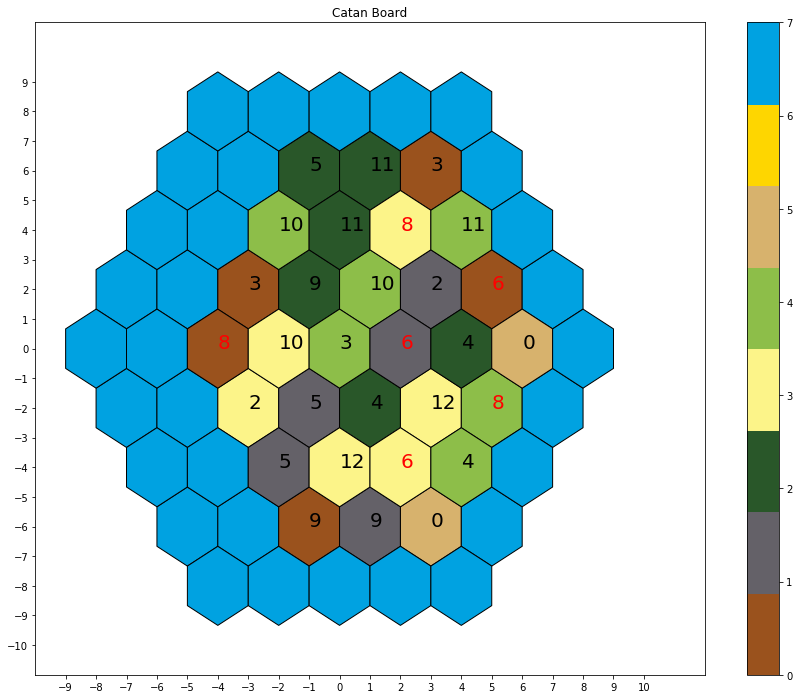

In [18]:
test=Catan_Board(0,1)
lol=test.Num2Res()
ok=test.ordering(lol[1])
test.res_token, test.token_value = np.array(lol[0])[ok],np.array(lol[1])[ok]
test.plot_board()

In [ ]:
class test:
    
    def __init__(self=None,l=None):  
        self.l=l
    
    def hi(self=None):
        if self.l > 2:
            return(3)
            
        else:
            return(5)


In [ ]:
print(test(0).hi())

        if self.big==1:
            
            Res2 = list(np.ones(len(Res)))
            Num_Values2 = list(100*np.ones(len(Res)))
            idd=0
            
            for x in np.arange(len(Res)):
                
                if x not in [0,4,9,15,22,28,33]:
                    Res2[x] = Res[idd]
                    Num_Values2[x] = Num_Values[idd]
                    idd += 1
                else:
                    Res2[x] = np.array(['Sea',' '])
                    Num_Values2[x] = 100
                    
            return(Res2,Num_Values2,Res)
            
        else:    
    
    
    
    def checkall(self=None,check=None,require=None): #ignores number greater than 100
        urn=np.arange(len(check))
        for i in urn:
            if check[i] in require or (check[i] >= 100):
                urn[i]=1
            else:
                urn[i]=0
        return(all(urn),list(urn).count(0))
        
    def disk_sum(self=None,number=None,radius=None): #radius >= 1    
#         if (len(number)) !=  [1, 7, 19, 37, 61, 91, 127, 169, 217, 271, 331, 397, 469, 547][radius]:        
#             return("Not a complete ring")
#         else:        
        sumset=np.ones(6*(radius**2), dtype=int)
        for i in np.arange(6):
            re=np.arange(1,7)                
            sumset[i]=int(number[0]+number[i+1]+number[re[np.mod(i+1,6)]])

        for x in np.arange(2,radius+1):
            n=6*(x)**2-6*(x-1)**2
            for k in np.arange(6):
                
                idd=k*(2*x-1)+6*(x-1)**2
                even=(x**3)-((x-1)**3) + k*x
                odd= ((x-1)**3)-((x-2)**3) + k*(x-1)

                hexseq=np.ones(int(n/6)+2,dtype=int)
                for m in np.arange(int(n/6)+2):
                    if not m % 2:
                        hexseq[m]=int(even+m/2)
                    else:
                        hexseq[m]=int(odd+m//2)
                if k==5:
                    hexseq[-1] = hexseq[-2]
                    hexseq[-2] = int(((x-1)**3)-((x-2)**3))
                for l in np.arange(len(hexseq[:-2])):
                    sumset[int(idd+l)] = int(sum(number[hexseq[l:l+3]]))
        return(sumset)
                
                
    def spiral(self=None,center=None,radius=None):
        cubedirect=np.vstack([np.array([2,0]), #left first
                              np.array([1,2]),
                              np.array([-1,2]),
                              np.array([-2,0]),
                              np.array([-1,-2]),
                              np.array([1,-2])])       

        result=list(np.ones(((radius+1)**3)-((radius)**3)))
        result[0]=np.array(center)
        
        for k in np.arange(1,radius+1):
            cube=np.array(center)+cubedirect[-2]*k
            result[int(((k)**3)-((k-1)**3))] = cube
            for i in np.arange(6):
                if i == 5:
                    for j in np.arange(k-1):
                        cube = cube + cubedirect[i]
                        result[int(((k)**3)-((k-1)**3)+i*k+(j+1))]=cube
                else:
                    for j in np.arange(k):
                        cube = cube + cubedirect[i]
                        result[int(((k)**3)-((k-1)**3)+i*k+(j+1))]=cube
        return np.array(result)
    
    def shuffle_parts(self=None,original_set=None, stationary_id=None):

        idx=np.arange(len(original_set))
        for i in idx[::-1]:
            if i in stationary_id:
                continue
            else:
                last=stationary_id[0]
                while last in stationary_id:
                    last=rand.randint(i+1)
                original_set[last],original_set[i]=original_set[i],original_set[last]
        return(original_set)
        

    res_token=[]
    token_value=[]
    
    def get_board(self=None,adj6=None,val_stack=None,stack_num=None):
        big=self.big
        
        idx=np.arange(len(self.token_value))
        
        l=0
        iteration=1
        sea=np.array([19,36,35,34,33,32,31])
        station=np.array([0,1,2,3,4,5,6,19,36,35,34,33,32,31])
        while self.checkall(self.disk_sum(self.token_value[idx],big+2),[7,8,9,10,11])[1] > 2 :
            #rand.shuffle(idx)
            if adj6:           #first ring
                while (list(self.token_value[idx][:7]).count(val_stack) != stack_num ) or not self.checkall(self.disk_sum(self.token_value[idx],1), [8,9,10,11])[0]:    
                    self.shuffle_parts(idx,sea)
            else:
                while not self.checkall(self.disk_sum(self.token_value[idx],1), [9,10,11])[0]:
                    self.shuffle_parts(idx,sea)

            if big: #second and third ring
                while self.checkall(self.disk_sum(self.token_value[idx],big+2),[7,8,9,10,11])[1]>2: 
                    self.shuffle_parts(idx,station)
                    iteration=iteration+1
                    if not np.mod(iteration,10000):
                        l=l+1
                        print(iteration)
                        break    
            else:
                 while not self.checkall(self.disk_sum(self.token_value[idx],big+2),[8,9,10,11])[0]: 
                    self.shuffle_parts(idx,np.arange(7))
                    iteration=iteration+1
                    if not np.mod(iteration,50000):
                        l=l+1
                        print(iteration)
                        break    
                        
        return(np.array(self.res_token)[idx],self.disk_sum(self.token_value[idx],big+2),iteration,l)
    